# Project - Program To Extract Old tweets, followers and tweets for the user lilMiquela and plot followers growth weekly and monthly basis   

# 1. Import Libraries and load dataset

In [749]:
import os
import csv
import GetOldTweets3 as got3
import pandas as pd
import numpy as np
import time
import datetime
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# 2. Function to extract the Twitter information using GetOldTweets Package

### Set the selection Criteria

In [863]:
Criteria = got3.manager.TweetCriteria().setQuerySearch("@lilmiquela").setSince("2017-05-01").setUntil("2019-05-01").setMaxTweets(20000)

### Fetch the tweets

In [864]:
tweets   = got3.manager.TweetManager.getTweets(Criteria)

In [865]:
getTweetsdf              = pd.DataFrame()
getTweetsdf['Tweets']    = np.array([tweet.text for tweet in tweets])
getTweetsdf['Tweet_Id']  = np.array([tweet.id for tweet in tweets])
getTweetsdf['Username']  = np.array([tweet.username for tweet in tweets])
getTweetsdf['Date']      = np.array([tweet.date for tweet in tweets])
getTweetsdf['Favorites'] = np.array([tweet.favorites for tweet in tweets])
getTweetsdf['Retweets']  = np.array([tweet.retweets for tweet in tweets])
getTweetsdf['Hashtags']  = np.array([tweet.hashtags for tweet in tweets])

In [870]:
getTweetsdf.head(1)

,Tweets,Tweet_Id,Username,Date,Favorites,Retweets,Hashtags
0,@lilmiquela you being called out.,1123363464284708865,azulgris27,2019-04-30 23:08:15+00:00,0,0,


In [871]:
getTweetsdf.to_csv('lilMiquela_getOldTweetsdf.csv')

### Get the MOST Follower IDs using tweepy 

In [872]:
import tweepy
from tweepy import OAuthHandler

In [873]:
consumer_key    = 'Kk4wq3V8YD9kwoiR78AyB6eW2'
consumer_secret = '1WOGDjP2bZ8iE6LPTGbL5Q3e634Ikpol2TsowtSW6nGi2jJhjz'
access_token    = '2453552150-SQv11IQ0nmT5USbBNiHgX19DLBbbNIX4IFf2DDc'
access_secret   = 'P8ODdPMyZnOEtRX2OV9NyXfB2zX6yxHbsJ7eYy6B91E10'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
auth_api = tweepy.API(auth)
 
api = tweepy.API(auth,wait_on_rate_limit=True, wait_on_rate_limit_notify=True, compression=True)

In [874]:
user = api.get_user("@lilmiquela")
print("User Name                          :",user.screen_name)
print("User ID of", user.screen_name, "is           :",user.id)
print("Followers Count                    :",user.followers_count)
print("Follows Count                      :",user.friends_count)
print("Likes                              :",user.favourites_count)

User Name                          : lilmiquela
User ID of lilmiquela is           : 715799614084001793
Followers Count                    : 22025
Follows Count                      : 381
Likes                              : 2903


### Extract User name and User created  using tweepy "followers" function

In [1280]:
items = 5000
users = tweepy.Cursor(api.followers,screen_name="lilmiquela").items(int(items))
outtweets = [[d.id,d.name.encode('utf-8'),d.created_at] for d in users]
outtweets = pd.DataFrame(outtweets)
outtweets.columns=['Id','Name','created_at']

In [1281]:
outtweets.shape

(2000, 3)

In [1282]:
# Extract ONLY date from the timestamp
date = outtweets['created_at'].dt.date

In [1283]:
data1  = pd.DataFrame({'Id':outtweets['Id'], 'User': outtweets['Name'], 'Date Created': outtweets['created_at'],'Date': date})
del(date)

In [1284]:
# Write outfiles to directory
data1.to_csv('lilMiquela_followers_v2.0.csv')
del(data1)

In [1285]:
# Load the Followers dataset
data = pd.read_csv("lilMiquela_followers_v2.0.csv")
data.drop('Unnamed: 0', axis = 1 , inplace= True)
os.remove('lilMiquela_followers_v2.0.csv')

In [1286]:
data.head(1)

,Id,User,Date Created,Date
0,1007908784059056128,b'Amanda',2018-06-16 08:52:34,2018-06-16


In [1287]:
data = data.sort_values(by=['Date'], ascending=False)
data = data.reset_index(drop=True)

In [1288]:
data.head(2)

,Id,User,Date Created,Date
0,1143281176897101827,b'ellie',2019-06-24 22:14:08,2019-06-24
1,1142995164593627142,b'Apollo',2019-06-24 03:17:37,2019-06-24


### Create new column "Days_Old" which indicates the age of the follower for the user = lilmiquela

In [1289]:
data['Days_Old']   = 0
rec_count          = data.shape[0]

for i in range(rec_count):
    
    then = data["Date"][i]
    then = datetime.strptime(then, "%Y-%m-%d").date()
    diff = today - then
    data['Days_Old'][i] = abs(diff).days

C:\Users\SRIHARI\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [1290]:
data.shape

(2000, 5)

In [1291]:
data.to_csv('lilMiquela_followers_v2.0.csv')

### End of Followers extraction process

## Subroutine to followers growth on weekly basis 

In [1292]:
def get_followers_age_range(week):
    
    if(week==1):
        start = 1
        end   = 7
        label1 = 'in the current week'
       
    if(week>1):
        start = 7*(week-1) + 1
        end   = start + 6

    
    count = data['Days_Old'][(data['Days_Old']>=start)&(data['Days_Old']<=end)].count()
    
    if(week==1):
        label1 = 'in the current week'
        print('{} accounts were created '.format(count) + label1)
        
    if(week>1):
        From = week -1
        To = week
        label1 = 'between the week ' + str(From) + ' and week ' + str(To)  
        print('{} accounts were created '.format(count) + label1)
    
    return()

In [1293]:
get_followers_age_range(1)

7 accounts were created in the current week


()

In [1294]:
get_followers_age_range(2)

9 accounts were created between the week 1 and week 2


()

In [1295]:
get_followers_age_range(3)

17 accounts were created between the week 2 and week 3


()

In [1296]:
get_followers_age_range(10)

11 accounts were created between the week 9 and week 10


()

In [1297]:
Current_Week  = data['Days_Old'][(data['Days_Old']>=1)&(data['Days_Old']<=7)].count()
week1_week2   = data['Days_Old'][(data['Days_Old']>=8)&(data['Days_Old']<=14)].count()
week2_week3   = data['Days_Old'][(data['Days_Old']>=15)&(data['Days_Old']<=21)].count()
week3_week4   = data['Days_Old'][(data['Days_Old']>=22)&(data['Days_Old']<=28)].count()
week4_week5   = data['Days_Old'][(data['Days_Old']>=29)&(data['Days_Old']<=35)].count()
week5_week6   = data['Days_Old'][(data['Days_Old']>=36)&(data['Days_Old']<=42)].count()
week6_week7   = data['Days_Old'][(data['Days_Old']>=43)&(data['Days_Old']<=49)].count()
week7_week8   = data['Days_Old'][(data['Days_Old']>=50)&(data['Days_Old']<=56)].count()
week8_week9   = data['Days_Old'][(data['Days_Old']>=57)&(data['Days_Old']<=63)].count()
week9_week10  = data['Days_Old'][(data['Days_Old']>=64)&(data['Days_Old']<=70)].count()

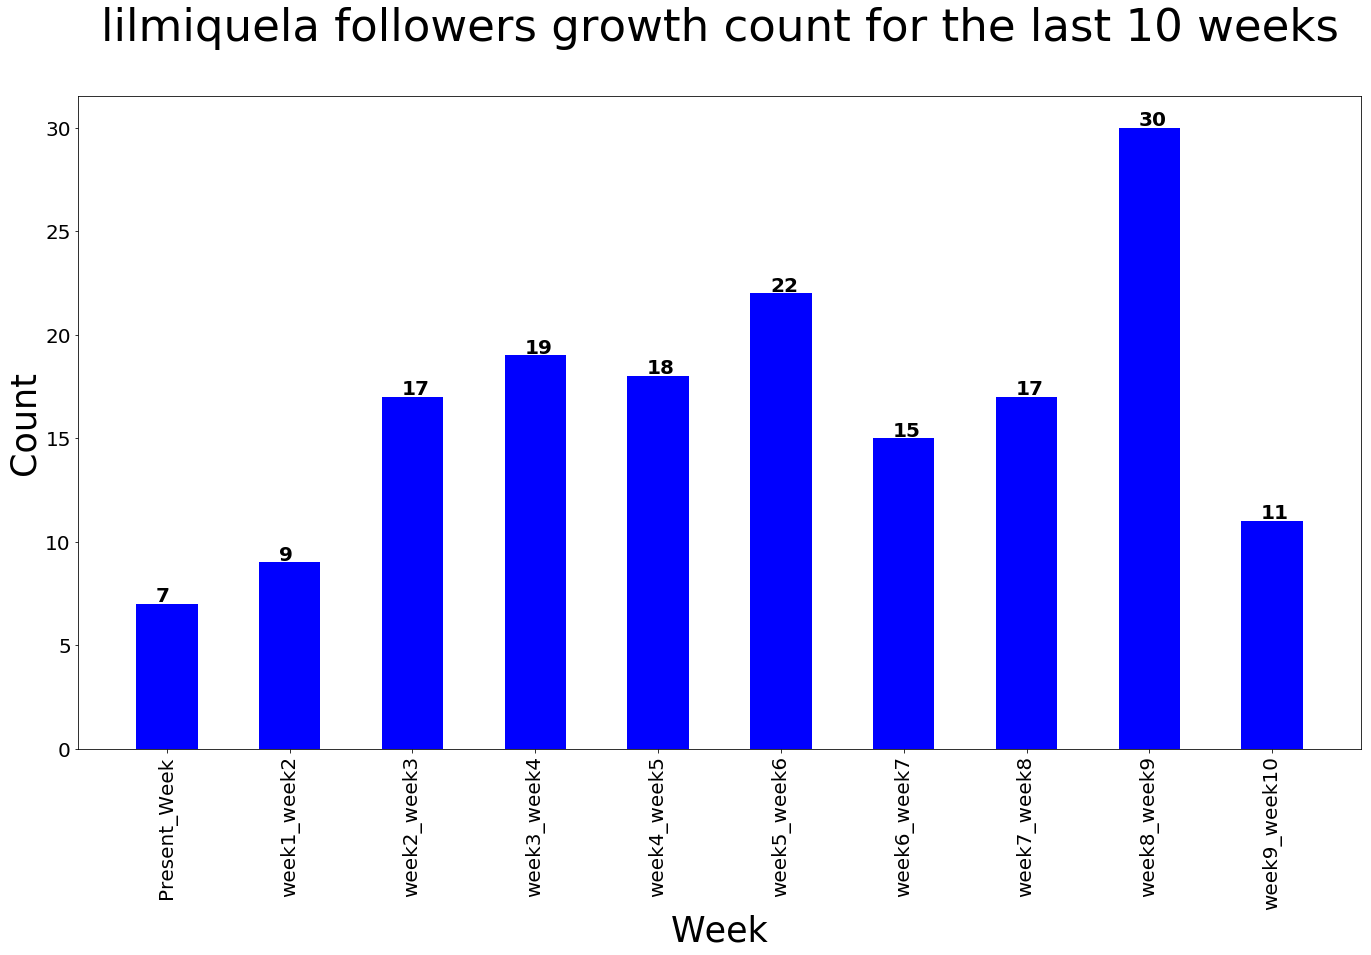

In [1298]:
list     = []
for i in range(10):
    list.append(i+1)    
    
    
week_total = [Current_Week,week1_week2,week2_week3,week3_week4,week4_week5,week5_week6,week6_week7,week7_week8,week8_week9,week9_week10]
plt.figure(figsize=(23,12))
barWidth = 0.5
plt.bar(list, week_total,width = barWidth,color='Blue')
plt.title("lilmiquela followers growth count for the last 10 weeks\n",fontsize=45)
plt.xlabel("Week",fontsize=35)
plt.ylabel("Count",fontsize=35)
plt.xticks(fontsize=20)
plt.xticks(rotation=90)
plt.yticks(fontsize=20)
plt.xticks(list,['Present_Week','week1_week2','week2_week3','week3_week4','week4_week5','week5_week6','week6_week7','week7_week8','week8_week9','week9_week10'])

# Text on the top of each barplot

for i in range(10):
    plt.text(x = list[i]-0.09 , y = week_total[i] +0.1 ,s = week_total[i], color = 'Black',size = 20,weight = 'bold')
    
plt.grid(False)

In [1260]:
data1 = data
data1['Date'] = pd.to_datetime(data1['Date'], errors='coerce')

### Get the followers growth between 2017-06-01  AND 2019-06-01

In [1268]:
df = pd.DataFrame({'Date': pd.date_range(start='2017-05-01', end='2019-05-01')})
df = df.groupby([data1['Date'].dt.year, data1['Date'].dt.month]).agg({'count'})
df.to_csv("df.csv")

In [1269]:
# Load the Followers dataset
df         = pd.read_csv("df.csv")
df.columns = ['Year','Month','New_Followers']
os.remove('df.csv')
df.dropna(inplace=True)
df['Year_Month']    = df['Year'] + '-' + df['Month']
df["Year"]          = df["Year"].astype(int)
df["Month"]         = df["Month"].astype(int)
df["New_Followers"] = df["New_Followers"].astype(int)

In [1270]:
df = df.sort_values(by=['Year','Month'], ascending=[True,True])
df = df.reset_index(drop=True)

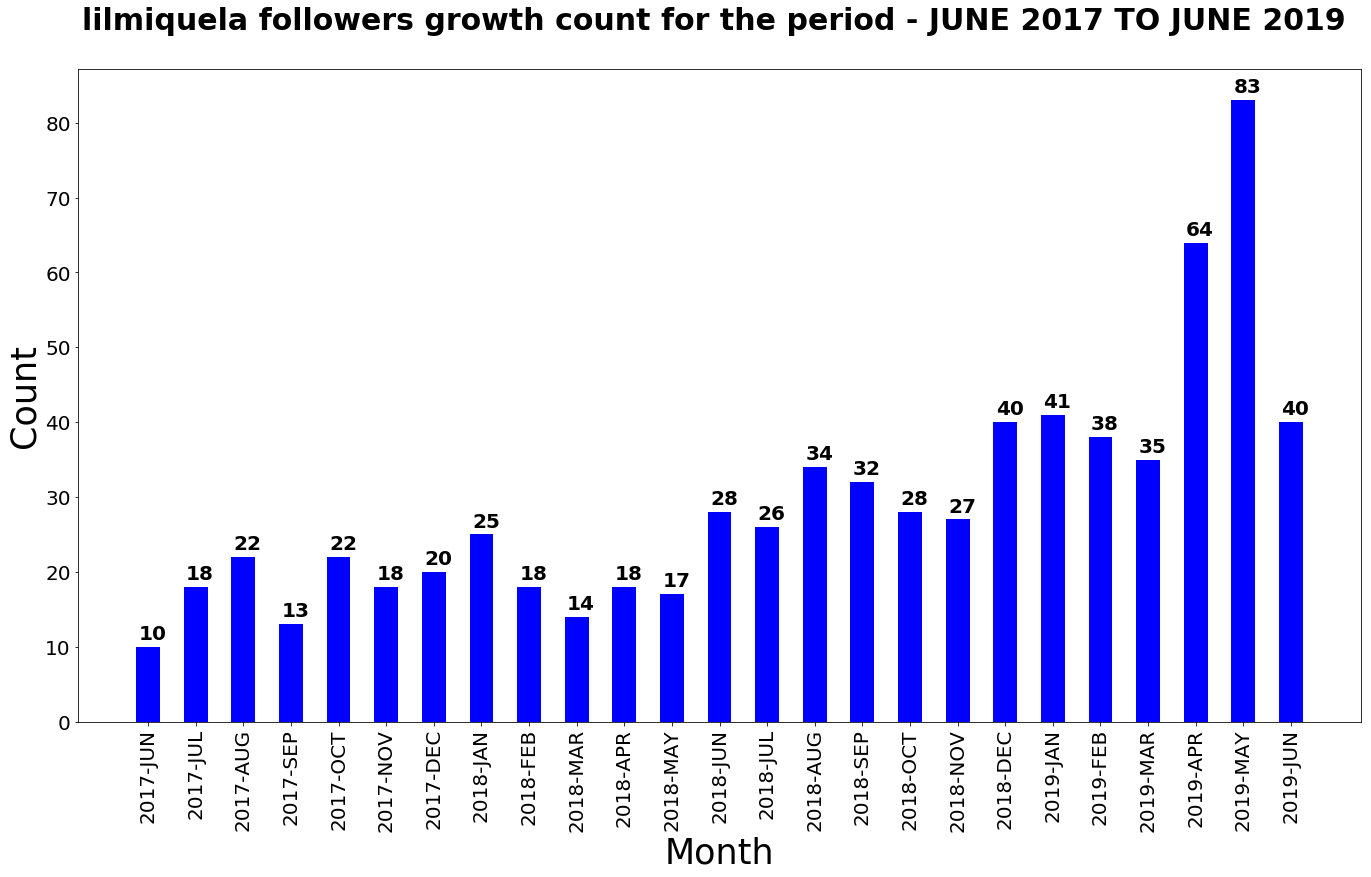

In [1299]:
list     = []
for i in range(25):
    list.append(i)    
    
month_total = []
for i in range(25):
    month_total.append(df['New_Followers'][i])

plt.figure(figsize=(23,12))
barWidth = 0.5
plt.bar(list, month_total,width = barWidth,color='Blue')
plt.title("lilmiquela followers growth count for the period - JUNE 2017 TO JUNE 2019 \n",fontsize=30,weight = 'bold')
plt.xlabel("Month",fontsize=35)
plt.ylabel("Count",fontsize=35)
plt.xticks(fontsize=20)
plt.xticks(rotation=90)
plt.yticks(fontsize=20)
plt.xticks(list,['2017-JUN','2017-JUL','2017-AUG','2017-SEP','2017-OCT','2017-NOV','2017-DEC','2018-JAN','2018-FEB','2018-MAR','2018-APR','2018-MAY','2018-JUN','2018-JUL','2018-AUG','2018-SEP','2018-OCT','2018-NOV','2018-DEC','2019-JAN','2019-FEB','2019-MAR','2019-APR','2019-MAY','2019-JUN'])

# Text on the top of each barplot

for i in range(25):
    plt.text(x = list[i] -.2 , y = month_total[i] +1 ,s = month_total[i], color = 'Black',size = 20,weight = 'bold')
    
plt.grid(False)

## Get the Twitter tweet Statistics